### Loading Data

In [1]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv', index_col='ID')

In [2]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 24)

In [4]:
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [6]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

In [7]:
cat_variables = [col for col in df.columns if df[col].nunique() <= 11]
num_variables = [col for col in df.columns if df[col].nunique() > 11]

In [8]:
cat_variables

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'default']

In [9]:
num_variables

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [10]:
len(num_variables)

14

### Exploratory Data Analysis

[]

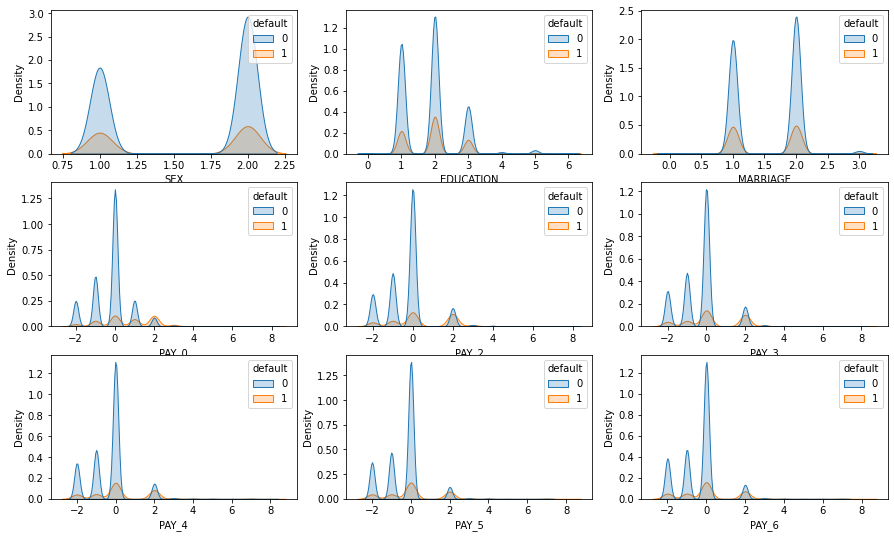

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,9)

fig,axes = plt.subplots(3,3)

k = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        sns.kdeplot(ax = axes[i][j], x=cat_variables[k], hue='default', data=df, shade=True)
        k += 1
        if k > 9: break
    
plt.plot()

[]

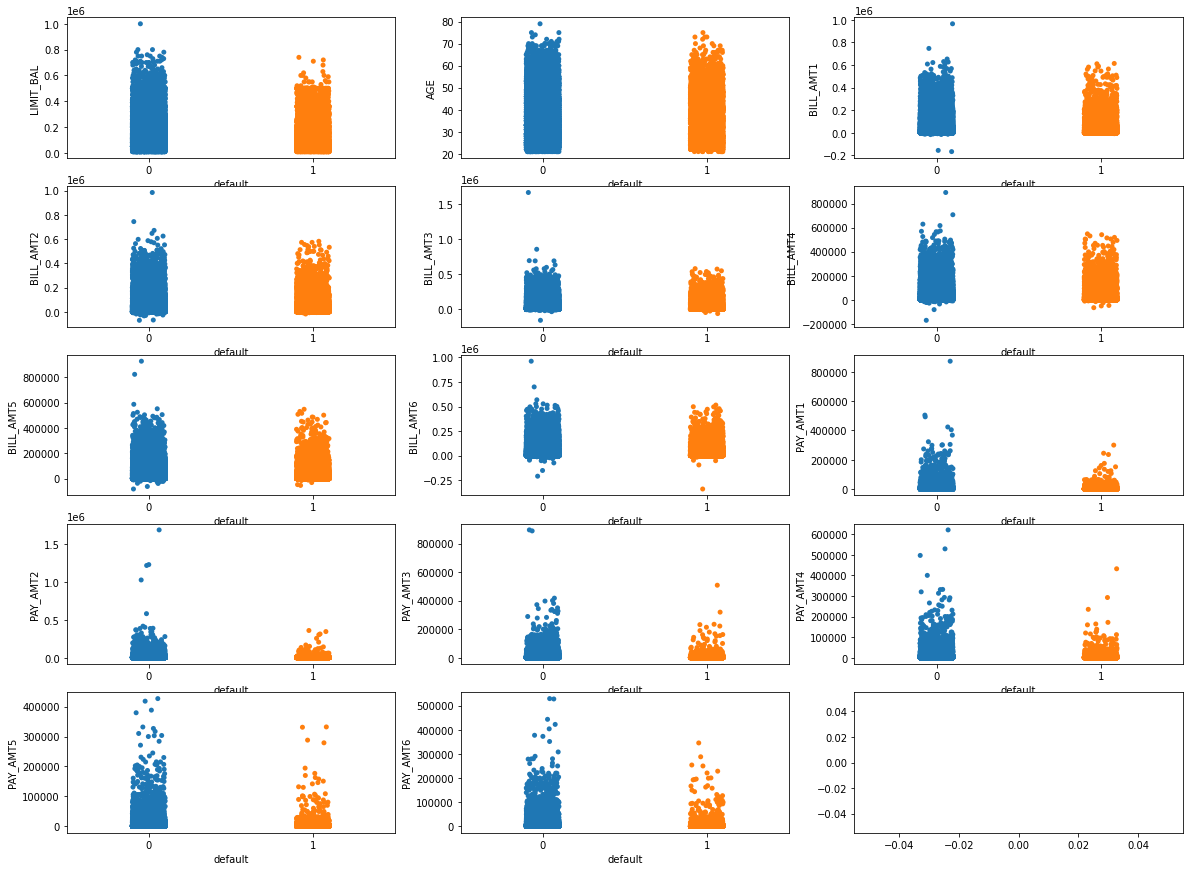

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,15)

fig,axes = plt.subplots(5,3)

k = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        sns.stripplot(ax = axes[i][j], y=num_variables[k], x='default', data=df)
        k += 1
        if k >= 14: break
    
plt.plot()

[]

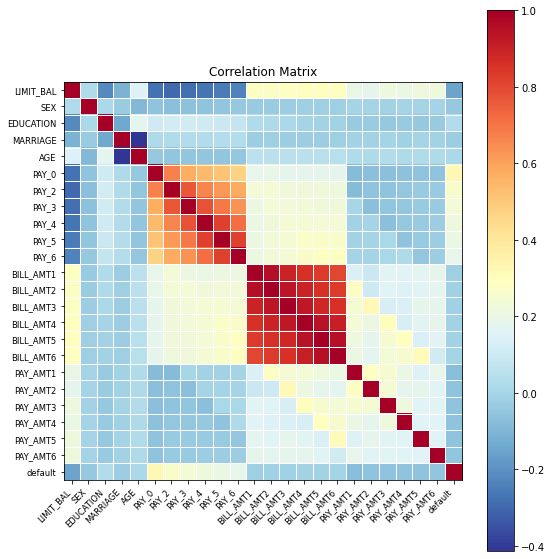

In [13]:
import statsmodels.api as sm
plt.rcParams['figure.figsize']=(8,8)
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=corr.columns)
plt.plot()

In [14]:
# adding the PAY columns together since they have some correlation with the target
PAY = [col for col in df.columns if col.__contains__('PAY') and 'AMT' not in col]
df['PAY'] = df[PAY].sum(axis=1)

### Get Training and Validation Data

In [15]:
# get independent and dependent variables
X = df.drop('default', axis=1)
y = df['default']

In [16]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Training data:', X_train.shape)
print('Validation data:', X_test.shape)

Training data: (22500, 24)
Validation data: (7500, 24)


### Model Training and Evaluation

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

seed = 0
linear = LogisticRegression(random_state=seed)
forest = RandomForestClassifier(random_state=seed)
boost = GradientBoostingClassifier(random_state=seed)
tree = DecisionTreeClassifier(random_state=seed)
svm = LinearSVC(random_state=seed)

In [18]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

models = [linear, forest, boost, tree, svm]

for model in models:
    # train model
    model.fit(X_train, y_train)
    # make predictions
    y_pred = model.predict(X_test)
    # get accuracy
    acc = accuracy_score(y_test, y_pred)
    # display results
    print(model)
    print('=======================')
    print('Accuracy: %.2f%%'%(acc*100))
    print()

LogisticRegression(random_state=0)
Accuracy: 78.24%

RandomForestClassifier(random_state=0)
Accuracy: 82.07%

GradientBoostingClassifier(random_state=0)
Accuracy: 82.67%

DecisionTreeClassifier(random_state=0)
Accuracy: 72.59%

LinearSVC(random_state=0)
Accuracy: 77.93%

